# Load Libriaries

In [ ]:
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

from sklearn.linear_model import LogisticRegression

import scipy.stats.stats as stats

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (20, 20), 
        "axes.titlesize" : 18 
    }
)

if not os.path.exists("images"): 
    os.mkdir("images")

from IPython.display import display, HTML
pd.options.mode.chained_assignment = None

SEED = 44

# Load Data

In [ ]:
pd_train = pd.read_csv('https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv', sep=';')
pd_test  = pd.read_csv('https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv', sep=';')
pd_descr = pd.read_csv('https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-desc.csv', sep=';')

In [ ]:
display(pd_train.head())
display(pd_test.head())
display(pd_descr.head())

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
0,7,52996000.0,48344000.0,48344000.0,0.0,0.0,4652000.0,-2608000.0,2044000.0,846000.0,0.0,1198000.0,0.0,7240000.0,4988000.0,2252000.0,0.0,255000.0,1198000.0,663000.0,15872000.0,0.0,11349000.0,4523000.0,0.0,198,136,3,3,3,[1-100],50000.0,2,0,0,0,0
1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256,135,12,12,12,[1-100],10000.0,5,0,0,0,0
2,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,33,28,28,28,[1-100],10000.0,2,0,0,0,0
3,22,32049000.0,29568000.0,29568000.0,0.0,0.0,2481000.0,-260000.0,2221000.0,302000.0,0.0,1919000.0,0.0,4245000.0,4082000.0,163000.0,0.0,25000.0,1919000.0,2219000.0,3652000.0,0.0,3652000.0,0.0,0.0,185,139,8,8,8,[1-100],300000.0,1,0,0,0,0
4,23,16458000.0,14935000.0,14935000.0,0.0,0.0,1523000.0,-274000.0,1249000.0,538000.0,0.0,711000.0,0.0,8950000.0,8606000.0,344000.0,0.0,492000.0,711000.0,12439000.0,1279000.0,0.0,0.0,1279000.0,0.0,220,138,27,27,27,[1-100],10000.0,2,0,0,0,0


,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg
0,196,39103000.0,38913000.0,38913000.0,0.0,0.0,190000.0,141000.0,331000.0,284000.0,0.0,47000.0,0.0,6009000.0,2451000.0,3558000.0,0.0,677000.0,47000.0,1178000.0,6130000.0,0.0,3000000.0,3130000.0,0.0,156,135,3,3,3,[1-100],100000.0,1,0,0,0
1,1196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216,138,5,5,5,[1-100],100000.0,1,0,0,0
2,2813,54174000.0,50929000.0,50929000.0,0.0,0.0,3245000.0,-1278000.0,1967000.0,500000.0,0.0,1467000.0,0.0,8175000.0,8037000.0,138000.0,0.0,237000.0,1467000.0,6835000.0,3906000.0,0.0,0.0,3906000.0,0.0,244,138,20,20,20,[1-100],250000.0,2,0,0,0
3,4385,1904000.0,1679000.0,1679000.0,0.0,0.0,225000.0,-88000.0,137000.0,0.0,0.0,137000.0,0.0,5790000.0,4314000.0,1476000.0,0.0,35000.0,137000.0,5691000.0,540000.0,0.0,500000.0,40000.0,0.0,272,139,9,9,9,[1-100],10000.0,2,0,0,0
4,6479,225584000.0,210685000.0,210685000.0,0.0,0.0,14899000.0,-12715000.0,2184000.0,445000.0,0.0,1739000.0,0.0,65485000.0,46006000.0,19479000.0,0.0,956000.0,1739000.0,12408000.0,47017000.0,0.0,16215000.0,30802000.0,0.0,254,139,3,3,3,(100-500],1700598.0,84,0,0,0


,field,desc_eng,desc_rus
0,ar_revenue,Sales revenue (at the end of the last year),Выручка от реализации (на конец последнего года)
1,ar_total_expenses,Total expenses for the last year,Общие расходы за последний год
2,ar_sale_cost,Cost of sales (at the end of the last year),Себестоимость продаж (на конец последнего года)
3,ar_selling_expenses,Selling expenses (at the end of the last year),Коммерческие расходы (на конец последнего года)
4,ar_management_expenses,Administrative expenses (at the end of the las...,Управленческие расходы (на конец последнего года)


In [ ]:
print('У нас есть следующие структуры данных:')
list(pd_train.dtypes.unique())

record_id                         int64
ar_revenue                      float64
ar_total_expenses               float64
ar_sale_cost                    float64
ar_selling_expenses             float64
ar_management_expenses          float64
ar_sale_profit                  float64
ar_balance_of_rvns_and_expns    float64
ar_profit_before_tax            float64
ar_taxes                        float64
ar_other_profit_and_losses      float64
ar_net_profit                   float64
ab_immobilized_assets           float64
ab_mobile_current_assets        float64
ab_inventory                    float64
ab_accounts_receivable          float64
ab_other_current_assets         float64
ab_cash_and_securities          float64
ab_losses                       float64
ab_own_capital                  float64
ab_borrowed_capital             float64
ab_long_term_liabilities        float64
ab_short_term_borrowing         float64
ab_accounts_payable             float64
ab_other_borrowings             float64


# EDA

Пропуски в данных:

In [ ]:
pd_train.isna().sum(0)

record_id                           0
ar_revenue                      15145
ar_total_expenses               15145
ar_sale_cost                    15145
ar_selling_expenses             15145
ar_management_expenses          15145
ar_sale_profit                  15145
ar_balance_of_rvns_and_expns    15145
ar_profit_before_tax            15145
ar_taxes                        15145
ar_other_profit_and_losses      15145
ar_net_profit                   15145
ab_immobilized_assets           15145
ab_mobile_current_assets        15145
ab_inventory                    15145
ab_accounts_receivable          15145
ab_other_current_assets         15145
ab_cash_and_securities          15145
ab_losses                       15145
ab_own_capital                  15145
ab_borrowed_capital             15145
ab_long_term_liabilities        15145
ab_short_term_borrowing         15145
ab_accounts_payable             15145
ab_other_borrowings             15145
bus_age                             0
ogrn_age    

In [ ]:
pd_test.isna().sum(0)

record_id                         0
ar_revenue                      118
ar_total_expenses               118
ar_sale_cost                    118
ar_selling_expenses             118
ar_management_expenses          118
ar_sale_profit                  118
ar_balance_of_rvns_and_expns    118
ar_profit_before_tax            118
ar_taxes                        118
ar_other_profit_and_losses      118
ar_net_profit                   118
ab_immobilized_assets           118
ab_mobile_current_assets        118
ab_inventory                    118
ab_accounts_receivable          118
ab_other_current_assets         118
ab_cash_and_securities          118
ab_losses                       118
ab_own_capital                  118
ab_borrowed_capital             118
ab_long_term_liabilities        118
ab_short_term_borrowing         118
ab_accounts_payable             118
ab_other_borrowings             118
bus_age                           0
ogrn_age                          0
adr_actual_age              

Одинаковое число пропусков во многих колонках, причем пропуски именно во всех этих колонках, значит, что это не случайные пропуски, а закономерные

In [ ]:
pd_train_no_fin = pd_train[pd_train['ar_revenue'].isna()]
no_fin_nans = pd_train_no_fin.isnull().sum(0)

In [ ]:
pd_train_no_fin.head()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256,135,12,12,12,[1-100],10000.0,5,0,0,0,0
2,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,33,28,28,28,[1-100],10000.0,2,0,0,0,0
5,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,100,5,5,5,[1-100],350000.0,1,0,0,0,0
6,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266,27,7,7,7,[1-100],35000.0,3,0,0,0,0
7,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,31,30,30,30,[1-100],10000.0,2,0,0,0,0


In [ ]:
pd_train_no_fin.shape

(15145, 37)

In [ ]:
no_fin_nans

record_id                           0
ar_revenue                      15145
ar_total_expenses               15145
ar_sale_cost                    15145
ar_selling_expenses             15145
ar_management_expenses          15145
ar_sale_profit                  15145
ar_balance_of_rvns_and_expns    15145
ar_profit_before_tax            15145
ar_taxes                        15145
ar_other_profit_and_losses      15145
ar_net_profit                   15145
ab_immobilized_assets           15145
ab_mobile_current_assets        15145
ab_inventory                    15145
ab_accounts_receivable          15145
ab_other_current_assets         15145
ab_cash_and_securities          15145
ab_losses                       15145
ab_own_capital                  15145
ab_borrowed_capital             15145
ab_long_term_liabilities        15145
ab_short_term_borrowing         15145
ab_accounts_payable             15145
ab_other_borrowings             15145
bus_age                             0
ogrn_age    

In [ ]:
pd_train_w_fin = pd_train[~pd_train['ar_revenue'].isna()]
fin_nans = pd_train_w_fin.isnull().sum(0)
fin_nans

record_id                       0
ar_revenue                      0
ar_total_expenses               0
ar_sale_cost                    0
ar_selling_expenses             0
ar_management_expenses          0
ar_sale_profit                  0
ar_balance_of_rvns_and_expns    0
ar_profit_before_tax            0
ar_taxes                        0
ar_other_profit_and_losses      0
ar_net_profit                   0
ab_immobilized_assets           0
ab_mobile_current_assets        0
ab_inventory                    0
ab_accounts_receivable          0
ab_other_current_assets         0
ab_cash_and_securities          0
ab_losses                       0
ab_own_capital                  0
ab_borrowed_capital             0
ab_long_term_liabilities        0
ab_short_term_borrowing         0
ab_accounts_payable             0
ab_other_borrowings             0
bus_age                         0
ogrn_age                        0
adr_actual_age                  0
head_actual_age                 0
cap_actual_age

In [ ]:
pd_train_w_fin.head()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
0,7,52996000.0,48344000.0,48344000.0,0.0,0.0,4652000.0,-2608000.0,2044000.0,846000.0,0.0,1198000.0,0.0,7240000.0,4988000.0,2252000.0,0.0,255000.0,1198000.0,663000.0,15872000.0,0.0,11349000.0,4523000.0,0.0,198,136,3,3,3,[1-100],50000.0,2,0,0,0,0
3,22,32049000.0,29568000.0,29568000.0,0.0,0.0,2481000.0,-260000.0,2221000.0,302000.0,0.0,1919000.0,0.0,4245000.0,4082000.0,163000.0,0.0,25000.0,1919000.0,2219000.0,3652000.0,0.0,3652000.0,0.0,0.0,185,139,8,8,8,[1-100],300000.0,1,0,0,0,0
4,23,16458000.0,14935000.0,14935000.0,0.0,0.0,1523000.0,-274000.0,1249000.0,538000.0,0.0,711000.0,0.0,8950000.0,8606000.0,344000.0,0.0,492000.0,711000.0,12439000.0,1279000.0,0.0,0.0,1279000.0,0.0,220,138,27,27,27,[1-100],10000.0,2,0,0,0,0
9,40,125432000.0,122655000.0,122655000.0,0.0,0.0,2777000.0,-63000.0,2714000.0,579000.0,0.0,2135000.0,0.0,24680000.0,8263000.0,16417000.0,0.0,106000.0,2135000.0,11267000.0,11912000.0,0.0,13000.0,11899000.0,0.0,170,132,15,15,15,(100-500],10000.0,2,0,0,0,0
10,54,59570000.0,59331000.0,59331000.0,0.0,0.0,239000.0,-97000.0,142000.0,38000.0,0.0,104000.0,0.0,38004000.0,23189000.0,14815000.0,0.0,449000.0,104000.0,10000.0,38443000.0,0.0,4986000.0,33457000.0,0.0,29,29,4,4,4,[1-100],10000.0,2,0,0,0,0


In [ ]:
pd_train_w_fin.shape

(17250, 37)

In [ ]:
pd_train_no_fin['ul_staff_range'].value_counts()

[1-100]      14791
(100-500]      267
> 500           87
Name: ul_staff_range, dtype: int64

In [ ]:
pd_train_no_fin['ul_founders_cnt'].value_counts()[:5]

1    9992
2    3542
3     961
4     266
5     137
Name: ul_founders_cnt, dtype: int64

Event Rate в train-выборке:

In [ ]:
# default rate в среднем по выборке
pd_train['default_12m'].mean()

0.06454699799351751

In [ ]:
# default rate по сдающим финотчетность
pd_train_w_fin['default_12m'].mean()

0.04614492753623188

In [ ]:
# default rate по несдающим финотчетность 
pd_train_no_fin['default_12m'].mean()

0.08550676791020138

Гипотеза: данные с пропусками финансовых признаках скорее всего относятся к малому бизнесу и ИП, т.к. они могут не предоставлять финотчетность. Проверим остальные парметры: если малое число сотрудников, небольшие фикс. суммы уставного капитала - скорее всего это гипотеза верна.

Вывод: уровень риска по малому бизнесу и ИП в 2 раза выше, чем по среднему и крупному бизнесу. Будем использовать это в качестве признака для модели

# Handeling Disblance in Dataset and Missing Values


1. Выборка несбалансированная, пробовали oversampling SMOTE, эффекта не дало.

2. Пробовали строить отдельно модели для этих 2ух сегментов, локально результат улучшился на валидационной выборке для финансово-отчетный клиентов, но по нефинансовым качество низкое. Качество на лидерборде при 2ух моделях проседает драматически

# Generate & Add Features

Создание новых признаков:

* активы
* пассивы
* признаки-отношения показателей
* показатели рентабельности
* etc
* индикаторы пропусков

In [ ]:
def generate_new_features(df):
    
    
    df['TL'] = df.ab_long_term_liabilities + df.ab_other_borrowings + df.ab_short_term_borrowing
    
    df['TA'] = df.ab_own_capital + df.ab_borrowed_capital
    
    df['TL_TA_ratio'] = df.TL / df.TA
    
    df['NO_FIN_REPORTING'] = df.ar_revenue.isna()
    
    df['ab_accounts_receivable_turnover'] = df['ar_revenue'] / (df['ab_accounts_receivable'])
    df['ar_sale_cost_to_revenue'] = df['ar_sale_cost'] / (df['ar_revenue'])
    df['ar_sale_cost_to_total_expenses'] = df['ar_sale_cost'] / (df['ar_total_expenses'])
    df['sale_cost_to_inventory'] = df.ar_sale_cost / (df.ab_inventory)
    df['taxes_revenue_ratio'] = df.ar_taxes / df.ar_revenue
    
    df['rent_net_profit'] = df.ar_net_profit / df.ar_revenue
    df['ros_1'] = df.ar_sale_profit / df.ar_revenue
    df['ros_2'] = df.ar_profit_before_tax / df.ar_revenue

    df['OPEX'] = df['ar_total_expenses'] - df['ar_selling_expenses'] - df["ar_management_expenses"]
   
    df['profit_gross_net_ratio'] = df.ar_profit_before_tax / df.ar_net_profit
    df['sellint_to_all_expences_ratio'] = df.ar_selling_expenses / (df.ar_total_expenses)
    df['rent_immob_assets'] = df.ar_revenue / (df.ab_immobilized_assets)
    df['rca'] = df.ar_revenue / (df.ab_mobile_current_assets + df.ab_cash_and_securities)
    df['coeff_short_term_borrowing'] = df.ab_short_term_borrowing / (df.ab_short_term_borrowing + df.ab_accounts_payable + df.ab_other_borrowings)
    df['liquidity'] = df.ab_mobile_current_assets / df.ab_short_term_borrowing
    df['rent_inventory'] = df.ab_inventory / df.ar_revenue
    df['debt_equity_ratio'] = df.ab_long_term_liabilities / df.ar_revenue
    df['fast_liquidity'] = df.ab_cash_and_securities / df.ab_short_term_borrowing
    
    df['kdz'] = (df.ab_accounts_receivable + df.ab_cash_and_securities) / df.TA
    
    df['ratio_of_merchandise_to_receivables'] = df.ab_inventory / df.ab_accounts_receivable
    df['ratio_of_merchandise_to_payables'] = df.ab_inventory / df.ab_accounts_payable
    df['ratio_of_inv_to_borrow_cap'] = df.ab_inventory / df.ab_borrowed_capital
    df['ratio_of_inventory_to_mob_curr_assets'] = df.ab_inventory / df.ab_mobile_current_assets
    df['k_siz'] = df.ab_cash_and_securities / df.ab_borrowed_capital
    df['cash_ratio_2'] = df.ab_cash_and_securities / (df.ab_short_term_borrowing + df.ab_accounts_payable)
    df['cash_ratio_3'] = df.ab_cash_and_securities / (df.ab_short_term_borrowing + df.ab_accounts_payable + df. ab_other_borrowings)

    df['rent_to_akt_pass_diff'] = df.ar_revenue / (df.TA - df.TL)
    
    df['ratio_kred_to_ps'] = df.ab_accounts_payable / (df.ab_short_term_borrowing + df.ab_accounts_payable + df.ab_other_borrowings)
    df['ratio_deb_to_asst'] = df.ab_accounts_receivable / (df.ab_cash_and_securities + df.ab_accounts_receivable)  
    
    train_df = df.copy()
    
    train_df['ar_revenue_ln'] = np.log(train_df['ar_revenue'] + 1)
    train_df['ar_revenue_150m_or_higher'] = np.where(train_df['ar_revenue'] >= 150000000, 1, 0)
    
    train_df['ar_total_expenses_was_negative'] = np.where(train_df['ar_total_expenses'] < 0, 1, 0)
    train_df['ar_total_expenses_to_revenue'] = train_df['ar_total_expenses'] / (train_df['ar_revenue'] +1)
    train_df['ar_sale_cost_was_negative'] = np.where(train_df['ar_sale_cost'] < 0, 1, 0)
    train_df['ar_sale_cost_was_zero'] = np.where(train_df['ar_sale_cost'] == 0, 1, 0)
    train_df['ar_sale_cost_to_revenue'] = train_df['ar_sale_cost']/(train_df['ar_revenue']+1)
    train_df['ar_sale_cost_to_total_expenses'] = train_df['ar_sale_cost']/(train_df['ar_total_expenses']+1)
    train_df['no_branches'] = np.where(train_df['ul_branch_cnt'] == 0, 1, 0)
    train_df['ar_revenue_to_ul_branch_cnt'] = train_df['ar_revenue'] / (train_df['ul_branch_cnt'] + 1)

    train_df['one_founder'] = np.where(train_df['ul_founders_cnt'] == 1, 1, 0)
    train_df['many_founders'] = np.where(train_df['ul_founders_cnt'] > 3, 1, 0)
    
    train_df['ul_capital_sum_to_ul_founders_cnt'] = train_df['ul_capital_sum'] / (train_df['ul_founders_cnt']+1)
    train_df['default_capital_sum'] = np.where(train_df['ul_capital_sum'] == 10000, 1, 0)
    
    train_df['old_company'] = np.where(train_df['adr_actual_age'] > 22, 1, 0)
    train_df['new_company'] = np.where(train_df['adr_actual_age'] < 3, 1, 0)
    
    train_df['new_ogrn'] = np.where(train_df['ogrn_age'] < 7, 1, 0)
    train_df['old_ogrn'] = np.where(train_df['ogrn_age'] >= 133, 1, 0)

    train_df['new_bus'] = np.where(train_df['bus_age'] < 7, 1, 0)
    train_df['old_bus'] = np.where(train_df['bus_age'] >= 220, 1, 0)
    
    train_df['ar_selling_expenses_was_negative'] = np.where(train_df['ar_selling_expenses'] < 0, 1, 0)
    train_df['ar_selling_expenses_to_revenue'] = train_df['ar_selling_expenses']/(train_df['ar_revenue']+1)
    train_df['ar_selling_expenses_to_total_expenses'] = train_df['ar_selling_expenses']/(train_df['ar_total_expenses']+1)

    train_df['ar_management_expenses_was_negative'] = np.where(train_df['ar_management_expenses'] < 0, 1, 0)
    train_df['ar_management_expenses_to_revenue'] = train_df['ar_management_expenses']/(train_df['ar_revenue']+1)
    train_df['ar_management_expenses_to_total_expenses'] = train_df['ar_management_expenses']/(train_df['ar_total_expenses']+1)


    train_df['ar_sale_profit_was_negative'] = np.where(train_df['ar_sale_profit'] < 0, 1, 0)
    train_df['ar_sale_profit_to_revenue'] = train_df['ar_sale_profit']/(train_df['ar_revenue']+1)
    train_df['ar_sale_profit_to_branches'] = train_df['ar_sale_profit']/(train_df['ul_branch_cnt']+1)

    train_df['ar_balance_of_rvns_and_expns_was_negative'] = np.where(train_df['ar_balance_of_rvns_and_expns'] < 0, 1, 0)
    train_df['ar_balance_of_rvns_and_expns_to_revenue'] = train_df['ar_balance_of_rvns_and_expns']/(train_df['ar_revenue']+1)

    train_df['ar_profit_before_tax_was_negative'] = np.where(train_df['ar_profit_before_tax'] < 0, 1, 0)
    train_df['ar_profit_before_tax_to_revenue'] = train_df['ar_profit_before_tax']/(train_df['ar_revenue']+1)
    train_df['ar_profit_before_tax_to_branches'] = train_df['ar_profit_before_tax']/(train_df['ul_branch_cnt']+1)

    train_df['ar_taxes_was_negative'] = np.where(train_df['ar_taxes'] < 0, 1, 0)
    train_df['ar_taxes_to_revenue'] = train_df['ar_taxes']/(train_df['ar_revenue']+1)
    train_df['ar_taxes_to_ar_profit_before_tax'] = train_df['ar_taxes']/(train_df['ar_profit_before_tax']+1)
    train_df['ar_taxes_to_ar_sale_profit'] = train_df['ar_taxes']/(train_df['ar_sale_profit']+1)

    train_df['ar_other_profit_and_losses_was_negative'] = np.where(train_df['ar_other_profit_and_losses'] < 0, 1, 0)
    train_df['ar_other_profit_and_losses_to_revenue'] = train_df['ar_other_profit_and_losses']/(train_df['ar_revenue']+1)

    train_df['ar_net_profit_was_negative'] = np.where(train_df['ar_net_profit'] < 0, 1, 0)
    train_df['ar_net_profit_to_revenue'] = train_df['ar_net_profit']/(train_df['ar_revenue']+1)
    train_df['ar_net_profit_to_branches'] = train_df['ar_net_profit']/(train_df['ul_branch_cnt']+1)
    train_df['ar_taxes_to_ar_net_profit'] = train_df['ar_taxes']/(train_df['ar_net_profit']+1)

    train_df['revenue_to_ab_immobilized_assets'] = train_df['ar_revenue']/(train_df['ab_immobilized_assets']+1)

    train_df['revenue_to_ab_mobile_current_assets'] = train_df['ar_revenue']/(train_df['ab_mobile_current_assets']+1)
    train_df['ab_immobilized_assets_to_ab_mobile_current_assets'] = train_df['ab_immobilized_assets']/(train_df['ab_mobile_current_assets']+1)
    train_df['ar_sale_profit_to_ab_mobile_current_assets'] = train_df['ar_sale_profit']/(train_df['ab_mobile_current_assets']+1)

    train_df['interest'] = train_df['ar_sale_profit'] - train_df['ar_profit_before_tax'] - train_df['ar_other_profit_and_losses']
    train_df['interest_was_negative'] = np.where(train_df['interest'] < 0, 1, 0)
    train_df['interest_to_revenue'] = train_df['interest']/(train_df['ar_revenue']+1)
    train_df['interest_to_gross_profit'] = train_df['interest']/(train_df['ar_sale_profit']+1)

    train_df['ab_inventory_to_ab_mobile_current_assets'] = train_df['ab_inventory']/(train_df['ab_mobile_current_assets']+1)
    train_df['inventory_turnover'] = train_df['ar_sale_cost']/(train_df['ab_inventory']+1)
    train_df['days_inventory_outstanding'] = train_df['ab_inventory']*365/(train_df['ar_sale_cost']+1)

    train_df['ab_accounts_receivable_was_negative'] = np.where(train_df['ab_accounts_receivable'] < 0, 1, 0)
    train_df['ab_accounts_receivable_turnover'] = train_df['ar_revenue']/(train_df['ab_accounts_receivable']+1)
    train_df['days_to_collect_ar'] = train_df['ab_accounts_receivable']*365/(train_df['ar_revenue']+1)

    train_df['ab_other_current_assets_was_negative'] = np.where(train_df['ab_other_current_assets'] < 0, 1, 0)

    train_df['ab_cash_and_securities_ln'] = np.log(train_df['ab_cash_and_securities']+1)
    train_df['days_cash_on_hand'] = (train_df['ab_cash_and_securities']-train_df['ar_sale_cost'])/365

    train_df['ab_losses_was_negative'] = np.where(train_df['ab_losses'] < 0, 1, 0)
    train_df['ab_losses_to_net_profit'] = train_df['ab_losses']/(train_df['ar_net_profit']+1)

    train_df['ab_own_capital_was_negative'] = np.where(train_df['ab_own_capital'] < 0, 1, 0)

    train_df['leverage'] = train_df['ab_borrowed_capital']/(train_df['ab_own_capital']+1)

    train_df['ab_long_term_liabilities_was_negative'] = np.where(train_df['ab_long_term_liabilities'] < 0, 1, 0)
    train_df['long_term_liabilities_to_all_debts'] = train_df['ab_long_term_liabilities']/(train_df['ab_borrowed_capital']+1)
    train_df['interest_to_all_debts'] = train_df['interest']/(train_df['ab_borrowed_capital']+1)

    train_df['ab_other_borrowings_was_negative'] = np.where(train_df['ab_other_borrowings'] < 0, 1, 0)
    train_df['ab_other_borrowings_to_all_debts'] = train_df['ab_other_borrowings']/(train_df['ab_borrowed_capital']+1)

    train_df['ab_short_term_borrowing_was_negative'] = np.where(train_df['ab_short_term_borrowing'] < 0, 1, 0)
    train_df['ab_short_term_borrowing_to_all_debts'] = train_df['ab_short_term_borrowing']/(train_df['ab_borrowed_capital']+1)

    train_df['accounts_payable_turnover'] = train_df['ar_sale_cost']/(train_df['ab_accounts_payable']+1)
    train_df['days_to_pay_vendors'] = train_df['ab_accounts_payable']*365/(train_df['ar_sale_cost']+1)
    train_df['cash_gap_days'] = train_df['days_inventory_outstanding'] + train_df['days_to_collect_ar'] - train_df['days_to_pay_vendors']

    train_df['assets'] = train_df['ab_immobilized_assets'] + train_df['ab_mobile_current_assets']
    train_df['current_ratio'] = train_df['ab_mobile_current_assets']/(train_df['ab_accounts_payable']+train_df['ab_short_term_borrowing']+1)
    train_df['debt_to_equity'] = train_df['ab_own_capital']/(train_df['ab_borrowed_capital']+1)
    train_df['quick_ratio'] = (train_df['ab_cash_and_securities']+train_df['ab_accounts_receivable'])/(train_df['ab_short_term_borrowing']+train_df['ab_accounts_payable']+1)
    train_df['return_on_assets'] = train_df['ar_profit_before_tax']/(train_df['assets']+1)
    train_df['return_on_investment'] = train_df['ar_profit_before_tax']/(train_df['ab_own_capital']+1)
    train_df['sales_on_assets'] = train_df['ar_revenue']/(train_df['assets']+1)

    train_df['working_capital'] = train_df['ab_mobile_current_assets'] - train_df['ab_accounts_payable'] - train_df['ab_short_term_borrowing']
    train_df['working_capital_was_negative'] = np.where(train_df['working_capital'] < 0, 1, 0)
    train_df['working_capital'] = train_df['working_capital'].abs() # Можно иначе убрать отрицательные значения

    train_df['inventory_higher_than_mobile_assets'] = np.where(train_df['ab_inventory_to_ab_mobile_current_assets'] > 1, 1, 0)

    train_df['cash_gap_days_was_negative'] = np.where(train_df['cash_gap_days'] < 0, 1, 0)
    train_df['cash_gap_days'] = train_df['cash_gap_days'].abs() # Можно иначе убрать отрицательные значения

    train_df['days_cash_on_hand_was_negative'] = np.where(train_df['days_cash_on_hand'] < 0, 1, 0)
    train_df['days_cash_on_hand'] = train_df['days_cash_on_hand'].abs() # Можно иначе убрать отрицательные значения
    
    
    df = train_df.copy()
    df = df.replace([-np.inf], np.nan)
    df = df.replace([np.inf], np.nan)
    
    df = df.drop(["TL", "TA"], axis=1)
    
    return df

In [ ]:
pd_train = generate_new_features(pd_train)
pd_test = generate_new_features(pd_test)

In [ ]:
pd_train.shape, pd_test.shape

((32395, 152), (200, 151))

# Train/Valid split

Разделение на обучающую/валидационную выборку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pd_train.drop(['default_12m', 'record_id'], axis=1),
                                                    pd_train['default_12m'],
                                                    test_size=0.1,
                                                    stratify=pd_train['default_12m'],
                                                    random_state=SEED, 
                                                    shuffle=True)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((29155, 150), (29155,), (3240, 150), (3240,))

# WOE-bining of Variables and IV Calculation

В качестве признакового пространства для моделирования будем использовать исходные и сгенерированные признаки, подвергнув их WOE-трасформации. 

Метод моделирования - логистическая регрессия.

Причины:

* обычно так разрабатываются рисковые модели в банках;
* подход с woe-трансформацией позволяет восстановить монотонную зависимость между независимымой переменной и зависимой (таргетом);
* упрощается обработка выбросов и уменьшается чувствительность моделей к выбросам; как в случае если бы мы использовали исходные значений фичей, то аномальное значение может сильно исказить прогнозируемую вероятность события;
* упрощение подхода к обработке пропущенных значений - на пропуски для кажого признака создаем свой бакет, это выглядит разумнее, чем делать fillna(0)
* моделирует нелинейные связи;
* понятная интерпретация - мождем построить скоринговую карту;
* ...

Предварительно для моделирования будем использовать не все признаки, а только, те, IV которых >= 0.02

Вспомогательный класс для разработки WOE-бининга непрерывных и категориальных фичей, а также расчета IV.

Методы:

* __конструктор__ - инициализация объектов класса, вот какие поля:
    * _X_ - признаки (без таргета)
    * _Y_ - таргет
    * _woe_ - DataFrame с бинами по признакам, статистики по бинам и границы бинов
    * _iv_ - DataFrame с IV по каждому признаку
    * _used_features_ - сюда запишутся использованные для бининга признаки после фильтрации по IV признаков (убираем признаки IV которых < 0.02)
    * max_bin - 20 бакетов (бинов) для признака по умолчанию для непрерывного признака
* __mono_bin__ - осуществляет woe-биннинг непрерывного числового признака
* __char_bin__ - woe-биннинг категориальных/бинарных признаков
* __data_vars__ - принимает на вход все признаки, определяет тип признака и в зависимости от этого вызывает mono_bin или char_bin
* __fit__ - верхнеуровневая обертка над data_vars() в целях соответствия API sklearn; "обучение" бининга - DataFrame с бинами, расчитанными граниицами бакетов и статистик по бакетам сохраняется в классовую переменную _woe_; DataFrame с рассчитанными IV - записывается в классовую переменную _iv_;
После расчета IV автоматически отфильтруются незначимые по IV признаки и в дальнейшем планируемые к использованию запишутся в классовую переменную _used_features_;
* __plot_bin__ - отрисовывает по признаку гистограмму с бинами, их границами, значениями WOE и ER (event rate);
* __plot_all_bins__ - в цикле вызывает отрисовку всех фичей датасета;
* __plot_iv__ - гистограмма IV по признакам;
* __transform__ - преобразовывает исходные значения признака в WOE.

Импутация пропусков в признаках выполняться не будет, в ходе WOE-трансформации пропуски попадут в отдельный бакет (бакет с пропусками называется -99999999999999)

In [ ]:
class WOE_Bining():
    
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.woe = pd.DataFrame()
        self.iv = pd.DataFrame()
        self.used_features = []
        self.max_bin = 20
        self.force_bin = 3
        
    
    def mono_bin(self, Y, X):
        
        n = self.max_bin
        
        df1 = pd.DataFrame({"X": X, "Y": Y})
        justmiss = df1[['X', 'Y']][df1.X.isnull()]
        notmiss = df1[['X', 'Y']][df1.X.notnull()]
        r = 0
        while np.abs(r) < 1:
            try:
                d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
                d2 = d1.groupby('Bucket', as_index=True)
                r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
                n = n - 1 
            except Exception as e:
                n = n - 1

        if len(d2) == 1:
            n = self.force_bin         
            bins = pd.core.algorithms.quantile(notmiss.X, np.linspace(0, 1, n))
            if len(np.unique(bins)) == 2:
                bins = np.insert(bins, 0, 1)
                bins[1] = bins[1] - (bins[1] / 2)
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, 
                               "Bucket": pd.cut(notmiss.X, np.unique(bins), include_lowest=True)}) 
            d2 = d1.groupby('Bucket', as_index=True)
    
        d3 = pd.DataFrame({}, index=[])
        d3["MIN_VALUE"] = d2.min().X
        d3["MAX_VALUE"] = d2.max().X
        d3["COUNT"] = d2.count().Y
        d3["EVENT"] = d2.sum().Y
        d3["NONEVENT"] = d2.count().Y - d2.sum().Y
        d3 = d3.reset_index(drop=True)
    
        if len(justmiss.index) > 0:
            d4 = pd.DataFrame({'MIN_VALUE': np.nan}, index=[0])
            d4["MAX_VALUE"] = np.nan
            d4["COUNT"] = justmiss.count().Y
            d4["EVENT"] = justmiss.sum().Y
            d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
            d3 = d3.append(d4, ignore_index=True)
    
        d3["EVENT_RATE"] = d3.EVENT / d3.COUNT
        d3["NON_EVENT_RATE"] = d3.NONEVENT / d3.COUNT
        d3["DIST_EVENT"] = d3.EVENT / d3.sum().EVENT
        d3["DIST_NON_EVENT"] = d3.NONEVENT / d3.sum().NONEVENT
        d3["WOE"] = np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
        d3["IV"] = (d3.DIST_EVENT - d3.DIST_NON_EVENT) * np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
        d3["VAR_NAME"] = "VAR"
        d3 = d3[['VAR_NAME', 'MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 
                 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
        d3 = d3.replace([np.inf, -np.inf], 0)
        d3.IV = d3.IV.sum()
    
        return d3
    
    
    def char_bin(self, Y, X):
        
        df1 = pd.DataFrame({"X": X, "Y": Y})
        justmiss = df1[['X', 'Y']][df1.X.isnull()]
        notmiss = df1[['X', 'Y']][df1.X.notnull()]    
        df2 = notmiss.groupby('X', as_index=True)
    
        d3 = pd.DataFrame({}, index=[])
        d3["COUNT"] = df2.count().Y
        d3["MIN_VALUE"] = df2.sum().Y.index
        d3["MAX_VALUE"] = d3["MIN_VALUE"]
        d3["EVENT"] = df2.sum().Y
        d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
        if len(justmiss.index) > 0:
            d4 = pd.DataFrame({'MIN_VALUE': np.nan}, index=[0])
            d4["MAX_VALUE"] = np.nan
            d4["COUNT"] = justmiss.count().Y
            d4["EVENT"] = justmiss.sum().Y
            d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
            d3 = d3.append(d4, ignore_index=True)
    
        d3["EVENT_RATE"] = d3.EVENT / d3.COUNT
        d3["NON_EVENT_RATE"] = d3.NONEVENT / d3.COUNT
        d3["DIST_EVENT"] = d3.EVENT / d3.sum().EVENT
        d3["DIST_NON_EVENT"] = d3.NONEVENT / d3.sum().NONEVENT
        d3["WOE"] = np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
        d3["IV"] = (d3.DIST_EVENT - d3.DIST_NON_EVENT) * np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
        d3["VAR_NAME"] = "VAR"
        d3 = d3[['VAR_NAME', 'MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 
                 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
        d3 = d3.replace([np.inf, -np.inf], 0)
        d3.IV = d3.IV.sum()
        d3 = d3.reset_index(drop=True)
    
        return d3
    
    def data_vars(self):
    
        #stack = traceback.extract_stack()
        #filename, lineno, function_name, code = stack[-2]
        #vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
        #final = (re.findall(r"[\w']+", vars_name))[-1]
    
        x = self.X.dtypes.index
        count = -1
    
        for i in x:
            
            if np.issubdtype(self.X[i], np.number) and len(pd.Series.unique(self.X[i])) > 2:
                #print("mono", i)
                conv = self.mono_bin(self.Y, self.X[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                #print("char", i)
                conv = self.char_bin(self.Y, self.X[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv, ignore_index=True)
    
        iv = pd.DataFrame({'IV': iv_df.groupby('VAR_NAME').IV.max()})
        iv = iv.reset_index()
        
        def calculate_pred_power(iv):
            if iv < 0.02:
                return "USELESS"
            elif iv >= 0.02 and iv < 0.1:
                return "WEAK"
            elif iv >= 0.1 and iv < 0.3:
                return "MEDIUM"
            elif iv >= 0.3 and iv < 0.5:
                return "STRONG"
            else:
                return "TOO GOOD TO BE TRUE"
                
        iv['PREDICTIVE_POWER'] = iv['IV'].map(calculate_pred_power)
        
        self.used_features = iv[~iv['PREDICTIVE_POWER'].isin(['USELESS'])]['VAR_NAME'].tolist()
        
        return iv_df.fillna(-99999999999999), iv.sort_values(by='IV', ascending=False)
    
    def fit(self):
        self.woe, self.iv = self.data_vars()
        
    def plot_bin(self, ev, for_excel=False):
        ind = np.arange(len(ev.index)) 
        width = 0.35
        fig, ax1 = plt.subplots(figsize=(5, 5))
        ax2 = ax1.twinx()
        p1 = ax1.bar(ind, ev['NONEVENT'], width, color=(24/254, 192/254, 196/254))
        p2 = ax1.bar(ind, ev['EVENT'], width, bottom=ev['NONEVENT'], color=(246/254, 115/254, 109/254))

        ax1.set_ylabel('Event Distribution', fontsize=15)
        ax2.set_ylabel('WOE', fontsize=15)

        plt.title(list(ev.VAR_NAME)[0], fontsize=20) 
        ax2.plot(ind, ev['WOE'], marker='o', color='blue')
        plt.legend((p2[0], p1[0]), ('bad', 'good'), loc='best', fontsize=10)

        q = list()
        for i in range(len(ev)):
            try:
                mn = str(round(ev.MIN_VALUE[i], 2))
                mx = str(round(ev.MAX_VALUE[i], 2))
            except:
                mn = str((ev.MIN_VALUE[i]))
                mx = str((ev.MAX_VALUE[i]))
            q.append(mn + '-' + mx)

        plt.xticks(ind, q, rotation='vertical')
        for tick in ax1.get_xticklabels():
            tick.set_rotation(60)
        plt.show()
        fig.savefig(f"images/{list(ev.VAR_NAME)[0]}.png", bbox_inches='tight')
        
    def plot_all_bins(self):
        for i in [x for x in self.X.columns]:
            ev = self.woe[self.woe.VAR_NAME == i]
            ev.reset_index(inplace=True)
            self.plot_bin(ev)
         
    def __plot_iv(self):
        #plt.plot(self.iv['VAR_NAME'], self.iv['IV'])
        #plt.title('Information Value', fontsize=20)
        #plt.xticks(self.iv['VAR_NAME'], rotation=85, fontsize=14, color='darkslategray')
        #plt.show()
        self.iv['woe_bins_graph'] = self.iv.VAR_NAME.map(lambda var: f'<img src="images/{var}.png"/>')
        HTML(self.iv.to_html(escape=False))
        
        
    def plot_iv(self):
        fig, ax = plt.subplots(figsize=(20, 20))
        sns.barplot(x=self.iv['VAR_NAME'], 
                    y=self.iv['IV'], 
                    data=self.iv, 
                    palette=sns.cubehelix_palette(len(self.X.columns), start=.5, rot=-.75, reverse=True))
        #plt.hlines([0.02, 0.1, 0.3, 0.5], 0, len(self.X.columns), colors='r')
        ax.set_title('IV values')
        plt.xticks(rotation=90)
        plt.show()
        fig.savefig("images/IV.png", bbox_inches='tight')

        
    def transform(self, X):
        
        X = X.copy()
        
        transform_vars_list = self.used_features
        
        transform_prefix = "woe_"
        
        for var in transform_vars_list:
            #print(var)
            feature_woe = self.woe[self.woe['VAR_NAME'] == var]
            transform_dict = dict(zip(feature_woe.MAX_VALUE, feature_woe.WOE))
            replace_cmd = ''
            replace_cmd1 = ''
            for i in sorted(transform_dict.items()):
                replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
                replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
            replace_cmd = replace_cmd + '0'
            replace_cmd1 = replace_cmd1 + '0'
            if replace_cmd != '0':
                try:
                    X[transform_prefix + var] = X[var].apply(lambda x: eval(replace_cmd))
                    #print(replace_cmd)
                except:
                    X[transform_prefix + str(var)] = X[var].apply(lambda x: eval(replace_cmd1))
                    #print(replace_cmd1)
        
        return X[[f for f in X.columns if f.startswith("woe_")]]        

In [ ]:
woe_bining = WOE_Bining(X_train, y_train)

In [ ]:
woe_bining.fit()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inpu

In [ ]:
# вот статистика по бакетам для всех признаков
woe_bining.woe

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,ar_revenue,0,5.651e+06,2590,236.0,0.091120,2354.0,0.908880,0.125399,0.086312,0.373523,2.075806e-01
1,ar_revenue,5.653e+06,1.5484e+07,2590,129.0,0.049807,2461.0,0.950193,0.068544,0.090236,-0.274948,2.075806e-01
2,ar_revenue,1.5494e+07,3.2476e+07,2589,102.0,0.039397,2487.0,0.960603,0.054198,0.091189,-0.520297,2.075806e-01
3,ar_revenue,3.2481e+07,6.0364e+07,2590,90.0,0.034749,2500.0,0.965251,0.047821,0.091666,-0.650674,2.075806e-01
4,ar_revenue,6.0381e+07,1.40875e+08,2590,88.0,0.033977,2502.0,0.966023,0.046759,0.091739,-0.673947,2.075806e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
554,inventory_higher_than_mobile_assets,1,1,3,0.0,0.000000,3.0,1.000000,0.000000,0.000110,0.000000,1.210042e-08
555,cash_gap_days_was_negative,0,0,26225,1742.0,0.066425,24483.0,0.933575,0.925611,0.897701,0.030617,9.746443e-03
556,cash_gap_days_was_negative,1,1,2930,140.0,0.047782,2790.0,0.952218,0.074389,0.102299,-0.318592,9.746443e-03
557,days_cash_on_hand_was_negative,0,0,14146,1223.0,0.086456,12923.0,0.913544,0.649841,0.473839,0.315860,1.272635e-01


In [ ]:
# пример как рзбился признак ar_revenue
woe_bining.woe[woe_bining.woe.VAR_NAME == "ar_revenue"]

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,ar_revenue,0,5.651e+06,2590,236.0,0.091120,2354.0,0.908880,0.125399,0.086312,0.373523,0.207581
1,ar_revenue,5.653e+06,1.5484e+07,2590,129.0,0.049807,2461.0,0.950193,0.068544,0.090236,-0.274948,0.207581
2,ar_revenue,1.5494e+07,3.2476e+07,2589,102.0,0.039397,2487.0,0.960603,0.054198,0.091189,-0.520297,0.207581
3,ar_revenue,3.2481e+07,6.0364e+07,2590,90.0,0.034749,2500.0,0.965251,0.047821,0.091666,-0.650674,0.207581
4,ar_revenue,6.0381e+07,1.40875e+08,2590,88.0,0.033977,2502.0,0.966023,0.046759,0.091739,-0.673947,0.207581
5,ar_revenue,1.41104e+08,7.94684e+08,2589,65.0,0.025106,2524.0,0.974894,0.034538,0.092546,-0.985651,0.207581
6,ar_revenue,-99999999999999,-99999999999999,13617,1172.0,0.086069,12445.0,0.913931,0.622742,0.456312,0.310955,0.207581


IV по всем признакам:

In [ ]:
woe_bining.iv

,VAR_NAME,IV,PREDICTIVE_POWER
46,ar_profit_before_tax,3.030781e-01,STRONG
47,ar_profit_before_tax_to_branches,3.010890e-01,STRONG
16,ab_losses,2.924389e-01,MEDIUM
25,ab_own_capital,2.894865e-01,MEDIUM
39,ar_net_profit,2.843531e-01,MEDIUM
...,...,...,...
15,ab_long_term_liabilities_was_negative,1.210042e-08,USELESS
67,ar_selling_expenses_was_negative,1.210042e-08,USELESS
22,ab_other_borrowings_was_negative,5.377867e-09,USELESS
24,ab_other_current_assets_was_negative,1.344442e-09,USELESS


Бесполезные признаки:

In [ ]:
iv_useless_features = woe_bining.iv[woe_bining.iv.PREDICTIVE_POWER == "USELESS"]

In [ ]:
iv_useless_features.shape[0]

29

In [ ]:
iv_useless_features

,VAR_NAME,IV,PREDICTIVE_POWER
111,new_ogrn,1.870805e-02,USELESS
109,new_bus,1.785814e-02,USELESS
93,default_capital_sum,1.091383e-02,USELESS
112,no_branches,1.073376e-02,USELESS
81,cash_gap_days_was_negative,9.746443e-03,USELESS
149,working_capital_was_negative,6.398844e-03,USELESS
142,ul_capital_sum,5.181563e-03,USELESS
63,ar_sale_profit_was_negative,4.107705e-03,USELESS
58,ar_sale_cost_was_zero,4.001769e-03,USELESS
26,ab_own_capital_was_negative,3.151866e-03,USELESS


Выявлены 31 бесполезных признака: ul_capital_sum, ul_branch_cnt, ul_strategic_flg, ul_systematizing_flg, etc.
    
Они отфильтрованы и в дальнейшем не используются


Отрисовываем графики с бинингом по всем фичам:

In [ ]:
woe_bining.plot_all_bins()

Гистограмма важности признаков по IV

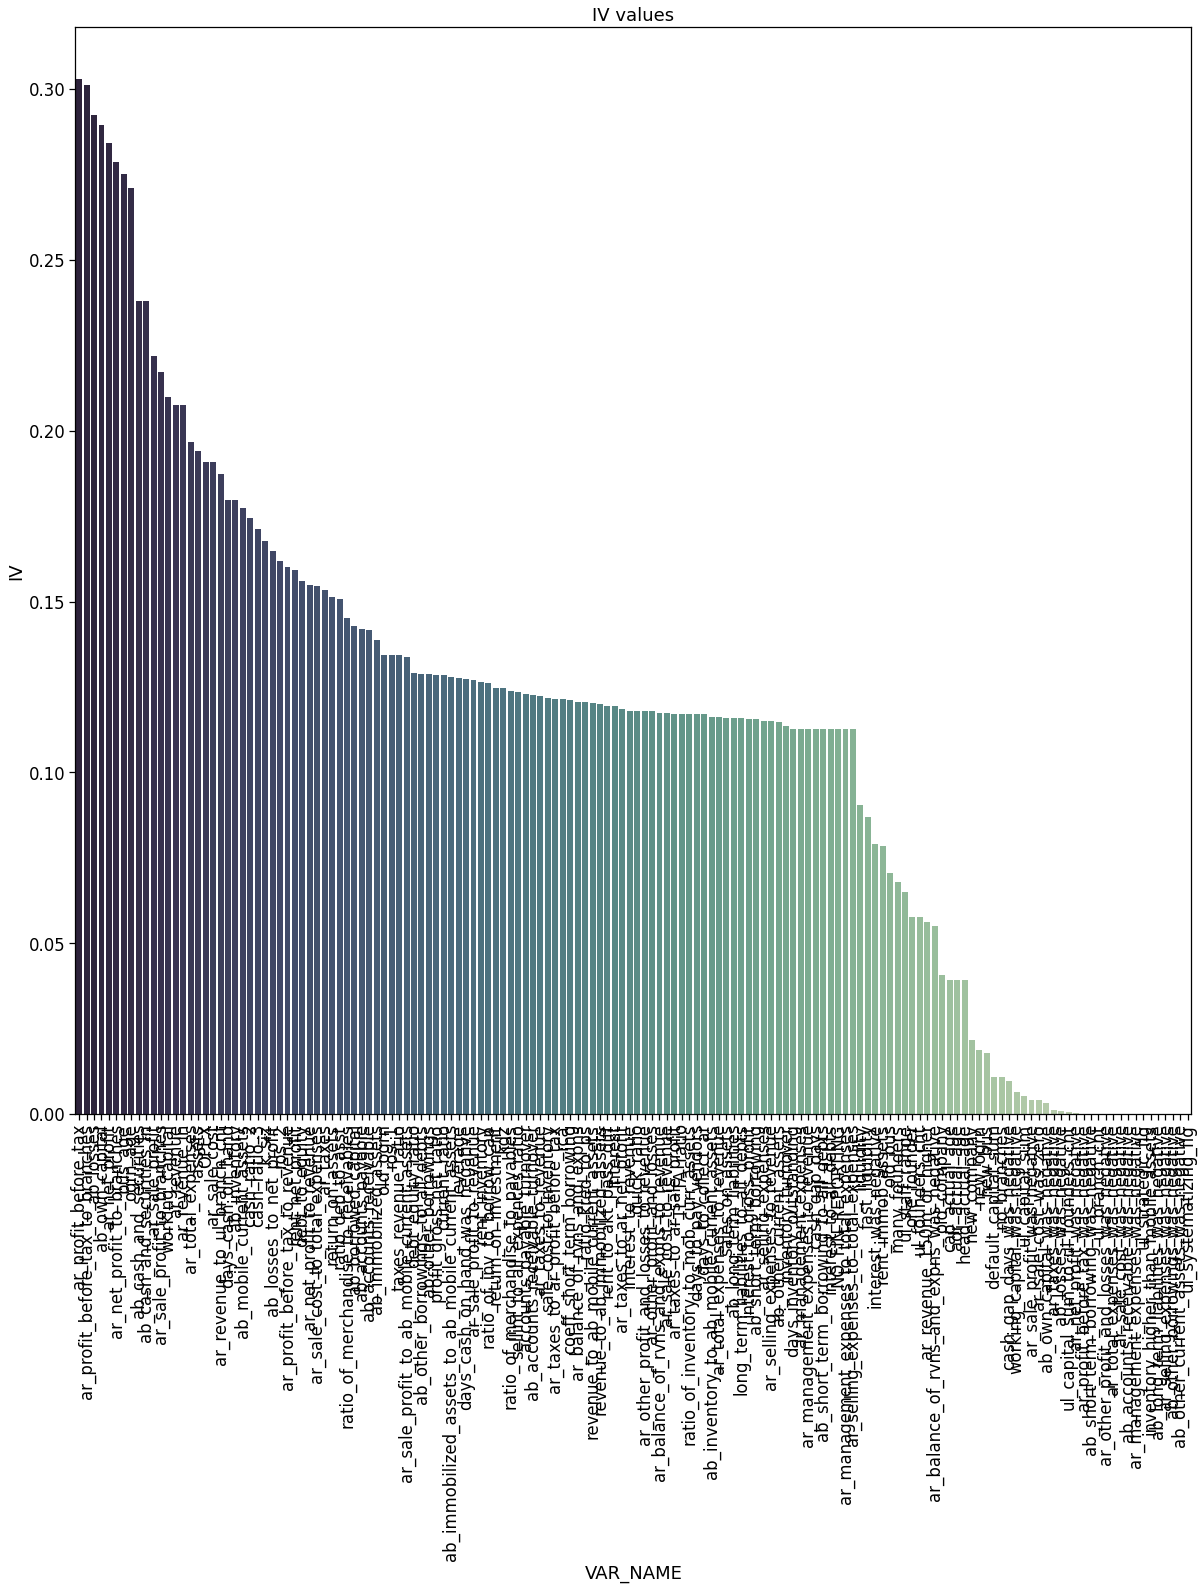

In [ ]:
#woe_bining.__plot_iv()
#display(HTML(woe_bining.iv.to_html(escape=False)))
woe_bining.plot_iv()

In [ ]:
# заполнили NAN на -99999999999999, потому что в табличке с границами бакетов это число есть индикатор NAN
X_train_woe = woe_bining.transform(X_train.fillna(-99999999999999))

In [ ]:
X_train_woe.head()

,woe_NO_FIN_REPORTING,woe_OPEX,woe_TL_TA_ratio,woe_ab_accounts_payable,woe_ab_accounts_receivable,woe_ab_accounts_receivable_turnover,woe_ab_borrowed_capital,woe_ab_cash_and_securities,woe_ab_cash_and_securities_ln,woe_ab_immobilized_assets,woe_ab_immobilized_assets_to_ab_mobile_current_assets,woe_ab_inventory,woe_ab_inventory_to_ab_mobile_current_assets,woe_ab_long_term_liabilities,woe_ab_losses,woe_ab_losses_to_net_profit,woe_ab_mobile_current_assets,woe_ab_other_borrowings,woe_ab_other_borrowings_to_all_debts,woe_ab_other_current_assets,woe_ab_own_capital,woe_ab_short_term_borrowing,woe_ab_short_term_borrowing_to_all_debts,woe_accounts_payable_turnover,woe_adr_actual_age,woe_ar_balance_of_rvns_and_expns,woe_ar_balance_of_rvns_and_expns_to_revenue,woe_ar_balance_of_rvns_and_expns_was_negative,woe_ar_management_expenses,woe_ar_management_expenses_to_revenue,woe_ar_management_expenses_to_total_expenses,woe_ar_net_profit,woe_ar_net_profit_to_branches,woe_ar_net_profit_to_revenue,woe_ar_other_profit_and_losses,woe_ar_other_profit_and_losses_to_revenue,woe_ar_profit_before_tax,woe_ar_profit_before_tax_to_branches,woe_ar_profit_before_tax_to_revenue,woe_ar_revenue,...,woe_interest_was_negative,woe_inventory_turnover,woe_k_siz,woe_kdz,woe_leverage,woe_liquidity,woe_long_term_liabilities_to_all_debts,woe_many_founders,woe_new_company,woe_ogrn_age,woe_old_bus,woe_old_company,woe_old_ogrn,woe_one_founder,woe_profit_gross_net_ratio,woe_quick_ratio,woe_ratio_deb_to_asst,woe_ratio_kred_to_ps,woe_ratio_of_inv_to_borrow_cap,woe_ratio_of_inventory_to_mob_curr_assets,woe_ratio_of_merchandise_to_payables,woe_ratio_of_merchandise_to_receivables,woe_rca,woe_rent_immob_assets,woe_rent_inventory,woe_rent_net_profit,woe_rent_to_akt_pass_diff,woe_return_on_assets,woe_return_on_investment,woe_revenue_to_ab_immobilized_assets,woe_revenue_to_ab_mobile_current_assets,woe_ros_1,woe_ros_2,woe_sale_cost_to_inventory,woe_sales_on_assets,woe_sellint_to_all_expences_ratio,woe_taxes_revenue_ratio,woe_ul_founders_cnt,woe_ul_staff_range,woe_working_capital
19837,-0.365445,-0.181113,-0.445763,-0.350380,-0.178433,-0.523973,-0.087598,-0.118680,-0.118680,-0.228188,-0.318112,-0.125811,-0.229653,-0.325531,0.167620,-0.871510,0.192413,-0.821448,-0.821448,-0.339354,0.379440,-0.286968,-0.359558,-0.224307,-0.146805,-0.241427,-0.436831,-0.340312,-0.369274,-0.369274,-0.365445,0.177179,0.175788,-0.007831,-0.335479,-0.335479,0.102751,0.091987,-0.374202,-0.274948,...,0.075772,-0.413584,-0.590328,-0.232305,-0.129593,0.154795,-0.325531,0.069278,-0.053051,0.335660,0.078474,-0.316514,0.174912,0.175314,-0.521108,-0.338789,-0.176935,-0.396160,-0.288873,-0.274178,-0.377639,-0.300636,-0.492304,0.101301,-0.414868,-0.077203,-0.236384,-0.697469,-0.213960,-0.245294,-0.503687,-0.437068,-0.374277,-0.485162,-0.454570,-0.394766,-0.541758,0.175314,0.066852,-0.135759
15273,-0.365445,-0.661847,-0.445763,-0.689747,-0.467587,-0.523973,-0.377249,-0.118680,-0.118680,-0.228188,-0.318112,-0.551356,-0.422877,-0.325531,-0.428039,-0.605321,-0.481429,-0.288131,-0.288131,-0.339354,-0.806616,-0.429116,-0.359558,-0.224307,-0.146805,-0.504894,-0.436831,-0.340312,-0.369274,-0.369274,-0.365445,-0.448319,-0.459514,-0.485151,-0.335479,-0.335479,-0.422675,-0.445141,-0.374202,-0.673947,...,0.075772,-0.413584,0.082060,-0.528406,-0.500276,-0.889068,-0.325531,0.069278,-0.053051,0.335660,0.078474,-0.316514,0.174912,-0.330348,-0.390093,-0.214368,-0.176935,-0.396160,-0.507670,-0.440089,-0.377639,-0.752164,-0.492304,0.101301,-0.414868,-0.501820,-0.236384,-0.697469,-0.213960,-0.500343,-0.503687,-0.437068,-0.374277,-0.485162,-0.454570,-0.394766,-0.541758,-0.330348,0.066852,-0.135759
27051,-0.365445,-0.541306,-0.299908,-0.016788,-0.178433,-0.523973,-0.377249,-0.118680,-0.118680,-0.228188,-0.318112,-0.520297,-0.461127,-0.325531,-0.428039,-0.605321,-0.341811,-0.288131,-0.288131,-0.339354,-0.178888,-0.467587,-0.371365,-0.527391,-0.146805,-0.504894,-0.436831,-0.340312,-0.369274,-0.369274,-0.365445,-0.448319,-0.459514,-0.728034,-

In [ ]:
X_train.shape, X_train_woe.shape

((29155, 150), (29155, 121))

Следующий шаг может занять 1-2 минуты

In [ ]:
X_test_woe = woe_bining.transform(X_test.fillna(-99999999999999))
X_test_woe.shape

Матрица корреляций __для исходных признаков__

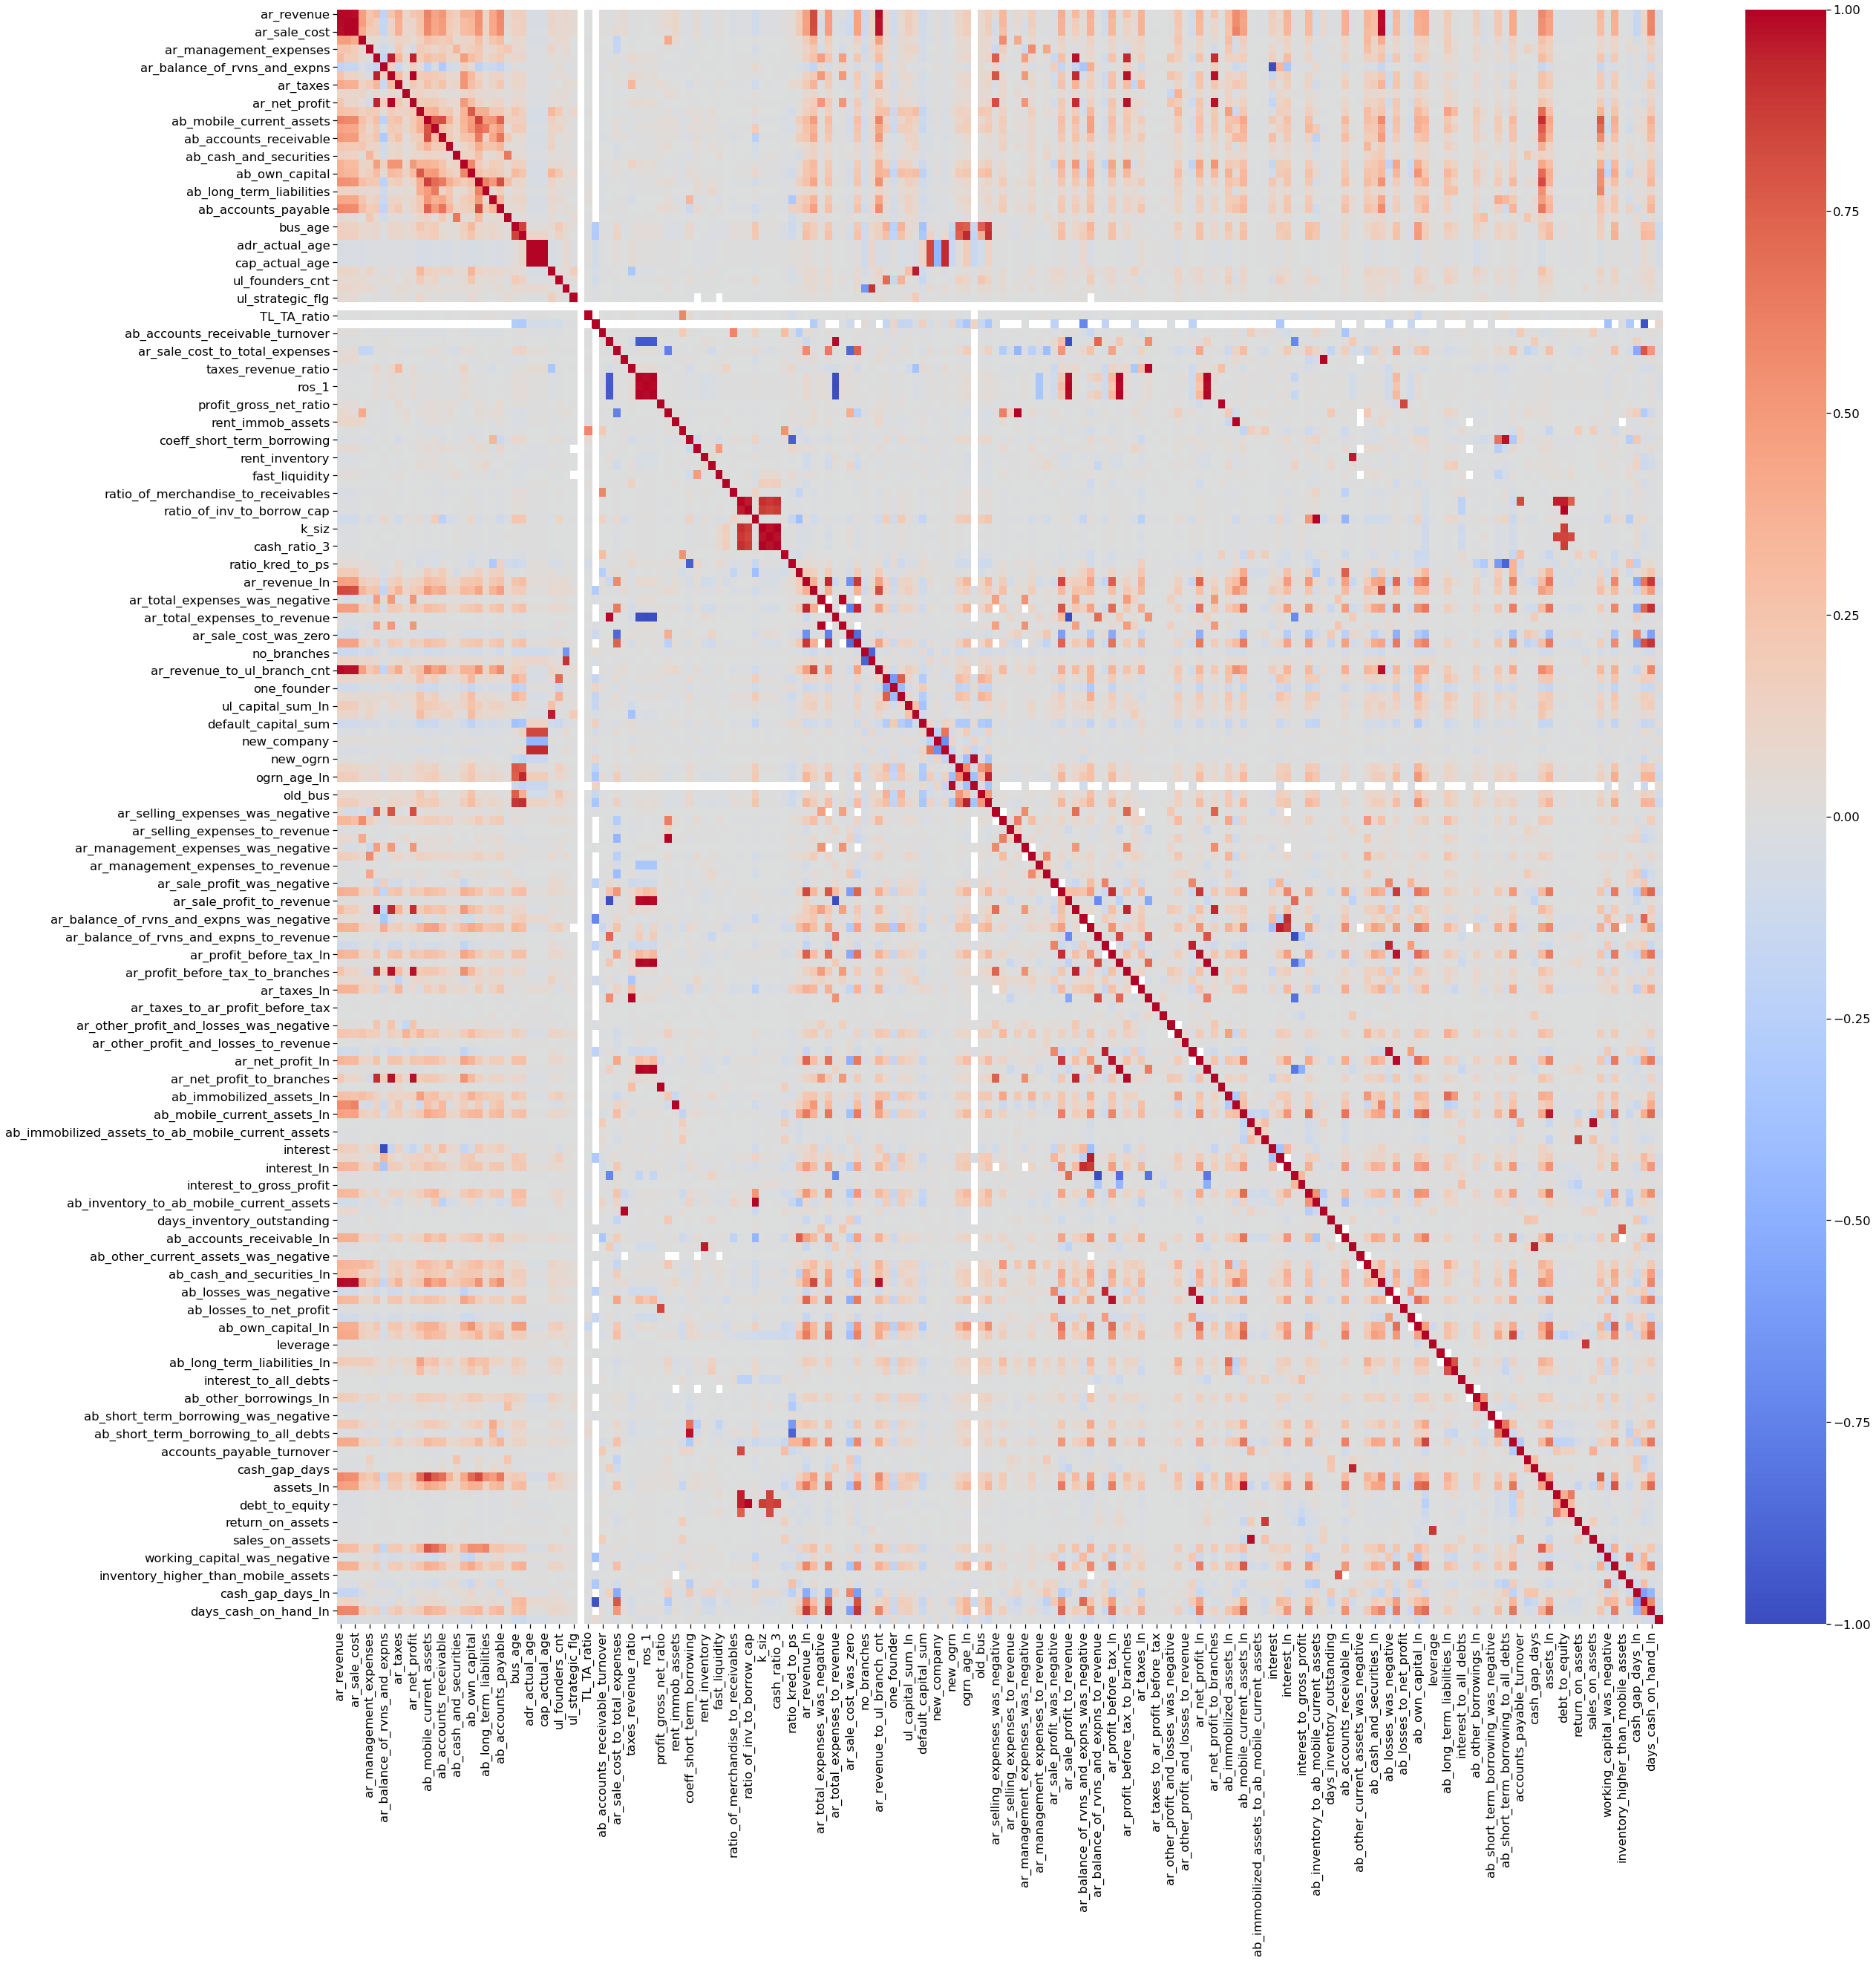

In [ ]:
f, ax = plt.subplots(figsize=(40, 40))
train_sample = X_train.copy()
train_sample['PD'] = y_train
features_corr = train_sample.corr()
sns.heatmap(features_corr, cmap='coolwarm', annot=False)
#sns.heatmap(features_corr, cmap='coolwarm', annot=True)
plt.show()

Матрица корреляций __для WOE-трансформированных признаков__

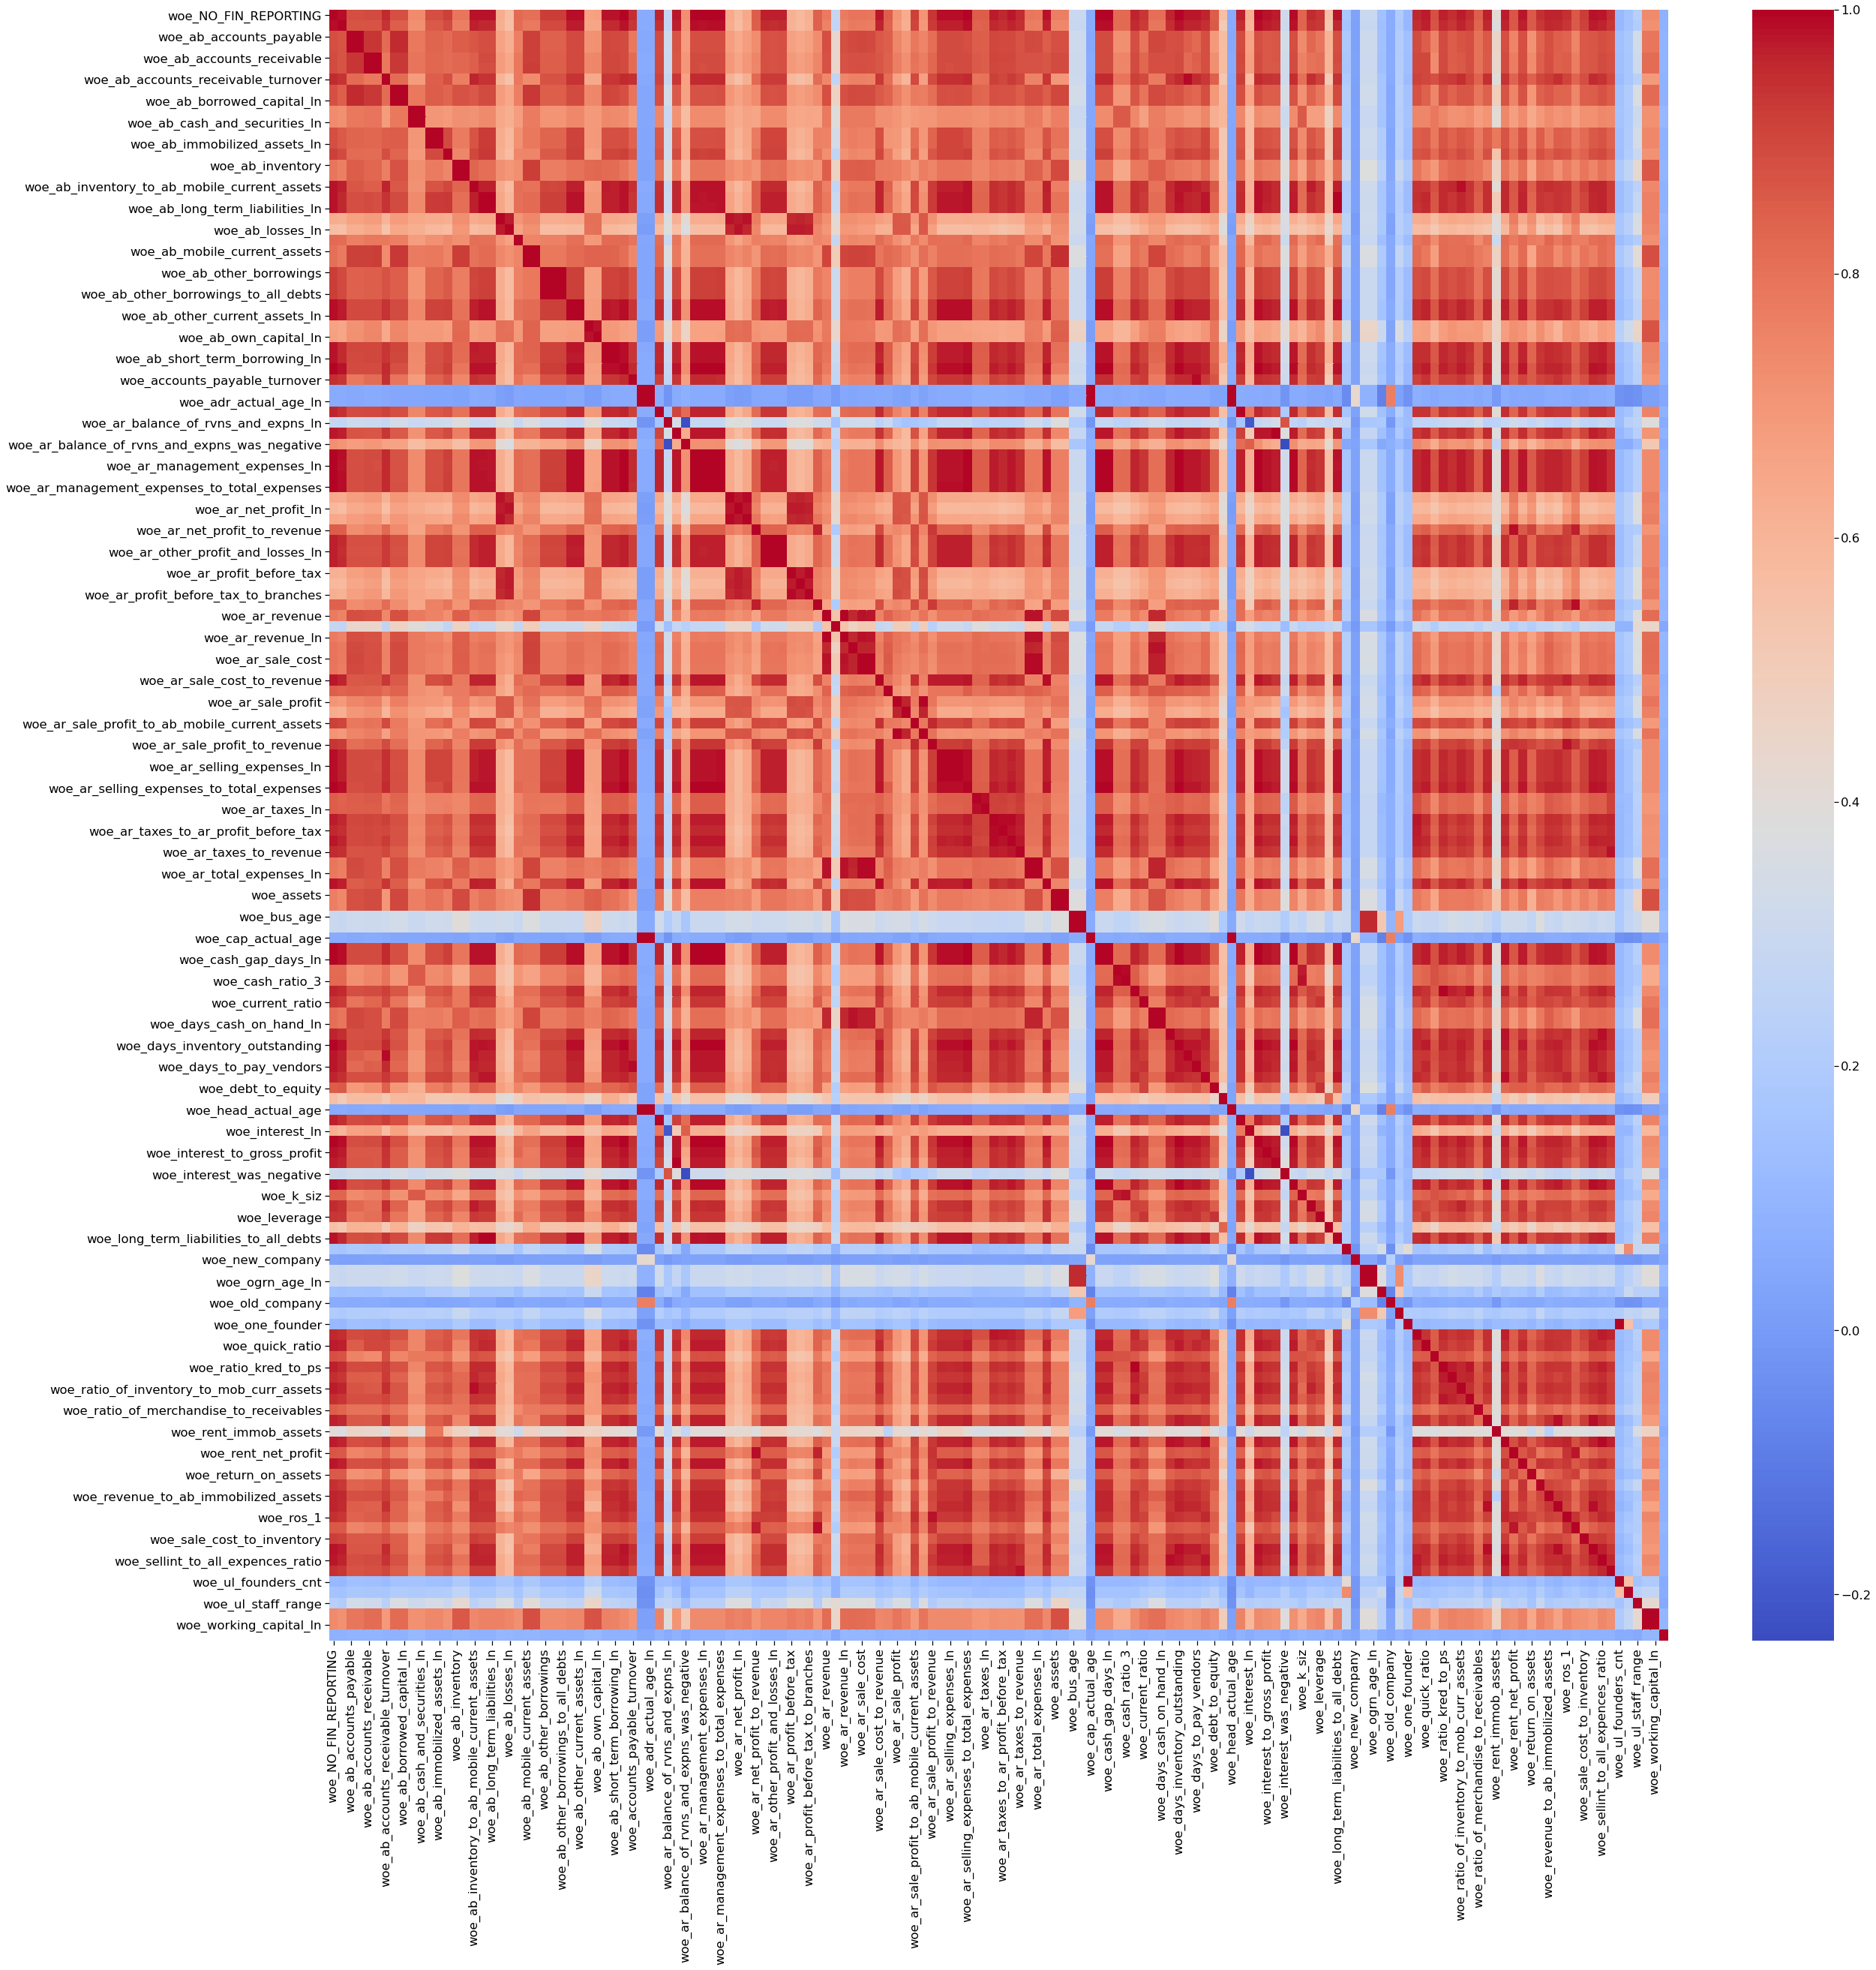

In [ ]:
f, ax = plt.subplots(figsize=(40, 40))
train_sample_woe = X_train_woe.copy()
train_sample_woe['PD'] = y_train
features_woe_corr = train_sample_woe.corr()
sns.heatmap(features_woe_corr, cmap='coolwarm', annot=False)
#sns.heatmap(features_woe_corr, cmap='coolwarm', annot=True)
plt.show()

Эффект от пользы WOE-трансформации на лицо так сказать: на WOE-преобразованных фичах корреляций найдено существенно больше, их конечно нужно же устранить, чтобы устранить мультиколлинеарность. Устранив мультиколлинеарность мы получим более корректные значения весов при признаках в линейной модели, и как следствие сможем лучше проинтерпретировать модель, но возможно после удаления части признаков качество модели просядет.

Проверим признаки на их важность по Gini

In [ ]:
sel = []
for fs in X_train_woe.columns:
    lr = LogisticRegression(random_state=SEED, C=0.5)
    lr = lr.fit(X_train_woe[[fs]], y_train)
    fs_gini = 2 *  roc_auc_score(y_train, lr.predict_proba(X_train_woe[[fs]])[:, 1]) - 1
    sel.append([fs, fs_gini])
f_gini = pd.DataFrame(sel, columns=['feature', 'gini'])
f_gini[f_gini.gini < 0.05]

,feature,gini
89,woe_new_company,0.046869


Признаки с вкладом в Gini < 5% можно устранить, но в данном случае всего один такой и он практически близок к 5. Решеили не удалять

# Modeling and Evaluation

Построим модель на всех woe-преобразованных фичах без устранения мультиколлинеарности:

Построим логистическую регрессию и подберем параметр регуляризации

In [ ]:
coef_reg = np.arange(0.00001, 5, 0.05)

folds = KFold(n_splits=5, shuffle=True, random_state=SEED)
mean_roc_auc_on_folds = []

for cr in coef_reg:
    for train_index, test_index in folds.split(X_train_woe, y_train):
      
      roc_auc_folds_trn = []
      roc_auc_folds_tst = []

      x_tr = X_train_woe.iloc[train_index]
      x_ts = X_train_woe.iloc[test_index]
        
      y_tr = y_train.iloc[train_index]
      y_ts = y_train.iloc[test_index]
      
      lr = LogisticRegression(penalty='l2', C=cr, random_state=SEED)  
      lr.fit(x_tr, y_tr)
        
      prob_tr = lr.predict_proba(x_tr)[:, 1]
      prob_ts = lr.predict_proba(x_ts)[:, 1]
        
      roc_auc_folds_trn.append(roc_auc_score(y_tr, prob_tr))
      roc_auc_folds_tst.append(roc_auc_score(y_ts, prob_ts))
    
    mean_roc_auc_on_folds.append(np.array(roc_auc_folds_tst).mean())    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
mean_roc_auc_on_folds[:5]

[0.6489603278066877,
 0.6759875805198263,
 0.6751829962560798,
 0.6746692019093895,
 0.6742782073587532]

In [ ]:
best_regr_coeff = coef_reg[np.array(mean_roc_auc_on_folds).argmax()]

In [ ]:
lr = LogisticRegression(random_state=SEED)
lr = lr.fit(X_train_woe, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
roc_auc_train = roc_auc_score(y_train, lr.predict_proba(X_train_woe)[:, 1])
gini_train = 2 * roc_auc_train - 1
print(roc_auc_train, gini_train)

0.7080242268778163 0.4160484537556326


In [ ]:
def plot_roc(y_actual, y_pred):
    '''
    Function to plot AUC-ROC curve
    '''
    fpr, tpr, thresholds = roc_curve(y_actual, y_pred)
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='b',
             label=r'Mean ROC (Gini = %0.2f)' % (2 * roc_auc_score(y_actual, y_pred) - 1),
             lw=2, alpha=.8)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Random', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('PD Model ROC')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

In [ ]:
test_pred_proba = lr.predict_proba(X_test_woe)[:, 1]

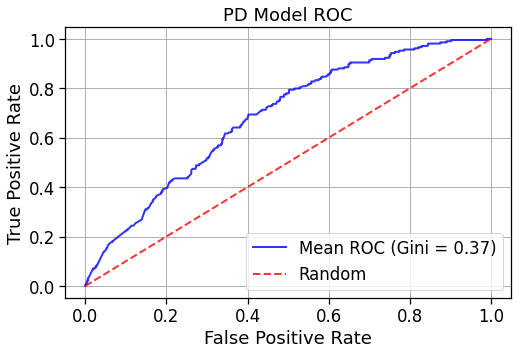

In [ ]:
plot_roc(y_test, test_pred_proba)

In [ ]:
roc_auc_score(y_test, test_pred_proba)

0.678853600513987

In [ ]:
# функция делает бутстрап выборки
def get_bootstrap_samples(y_true, y_pred, n_samples=1000):
    indices = np.random.randint(0, len(y_true), (n_samples, len(y_true)))
    samples_true_labels = y_true.values[indices]
    samples_pred_labels = y_pred[indices]
    return samples_true_labels, samples_pred_labels

# 955 CI for statistics
def stat_intervals(stat, alpha=0.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [ ]:
arr_true_labels, arr_pred_probas = get_bootstrap_samples(y_test, test_pred_proba)
roc_auc_statistics = list(map(lambda pair: roc_auc_score(pair[0], pair[1]), zip(arr_true_labels, arr_pred_probas)))
roc_ci = stat_intervals(roc_auc_statistics)

In [ ]:
roc_ci

array([0.64209677, 0.71177509])

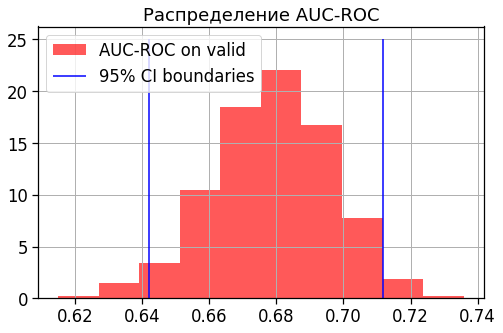

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('Распределение AUC-ROC')
plt.hist(roc_auc_statistics, color='r', label='AUC-ROC on valid', density=True, alpha=0.65)
plt.vlines(roc_ci, 0, 25, colors='b', label='95% CI boundaries')
plt.legend()
plt.grid()
plt.show()

In [ ]:
cutoff = y_train.mean()

In [ ]:
test_pred_labels = (test_pred_proba >= cutoff).astype(int)

In [ ]:
accuracy_score(y_test, test_pred_labels)

0.5907407407407408

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    plt.figure(figsize=(8, 8))
    cf_matrix = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt=".2f")
    ax.set_title('PD Classification Confusion Matrix\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('\nActual Values ')
    ax.xaxis.set_ticklabels(['Non-Defaulft', 'Default'])
    ax.yaxis.set_ticklabels(['Non-Defaulft', 'Defaullt'])
    plt.show()

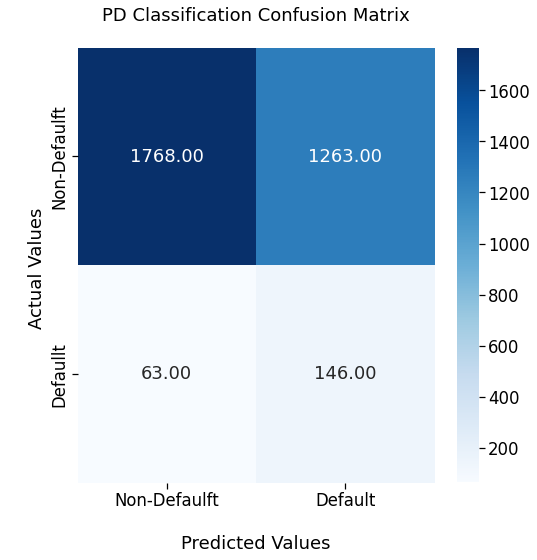

In [ ]:
plot_confusion_matrix(y_test, test_pred_labels)

In [ ]:
def plot_log_reg_weights(lr, X_train):
    lr_weights = pd.DataFrame({'feature': X_train.columns, 'weight': lr.coef_.flatten()})\
    .sort_values(by='weight', ascending=False)
    plt.figure(figsize=(10, 30))
    sns.barplot(y=lr_weights['feature'], 
                x=lr_weights['weight'], 
                data=lr_weights,
                orient='horisontal'
                )
    plt.title("Coefficients of the Logistic Regression")
    plt.xticks(rotation=90)
    plt.show()

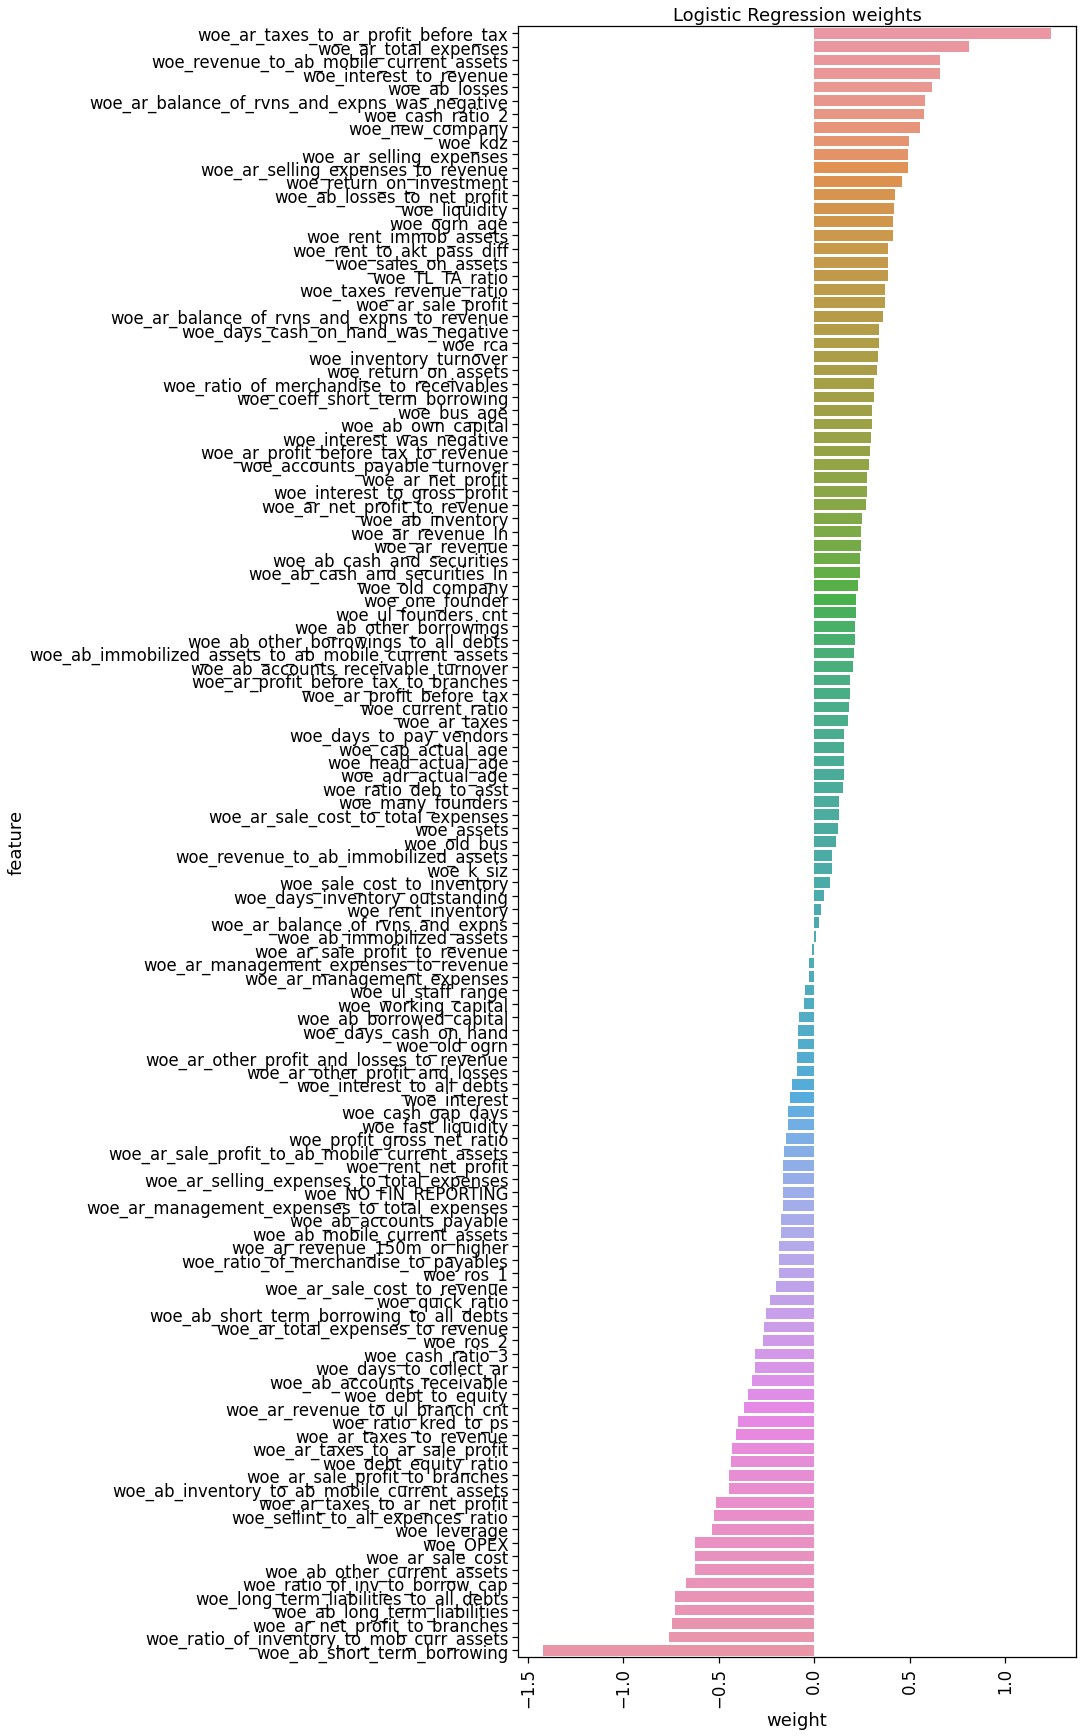

In [ ]:
plot_log_reg_weights(lr, X_train_woe)

In [ ]:
!pip install shap

     |████████████████████████████████| 371 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509237 sha256=bfd5d5e1fea0d4e826607441cb92e5cf8a7e98d44e85651f67385567bc61a50b
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
import shap

explainer = shap.Explainer(lr, X_train_woe, feature_names=X_train_woe.columns)
shap_values = explainer(X_train_woe)

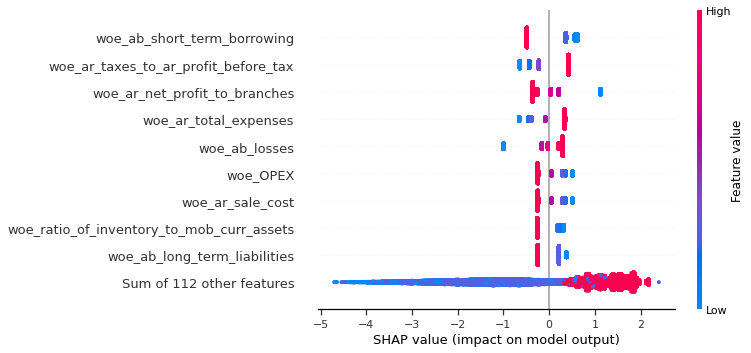

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
answer = pd_test[['record_id']]
X_scoring = pd_test.drop(['record_id'], axis=1)
X_scoring_woe = woe_bining.transform(X_scoring.fillna(-99999999999999))
#cutoff = y_train.mean()
y_scoring_prob = lr.predict_proba(X_scoring_woe)[:, 1] 
cutoff = np.median(y_scoring_prob, axis=0)
y_scorin_labels = (y_scoring_prob >= cutoff).astype(int)
answer['predict'] = y_scorin_labels
answer.to_csv('woe.csv', index=False, sep=';')

<ipython-input-117-d146f34e4e9f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer['predict'] = y_scorin_labels


In [ ]:
# ОБУЧИМ ПОСТРОЕННУЮ МОДЕЛЬ НА ВСЕХ ИМЕЮЩИХСЯ ДАННЫХ
pd_train = pd.read_csv("PD-data-train.csv", sep=';')
pd_train = generate_new_features(pd_train)
y_train_all = pd_train.default_12m
X_train_all = pd_train.drop(['record_id', 'default_12m'], axis=1)

w_tr = WOE_Bining(X_train_all, y_train_all)
w_tr.fit()
X_train_all_woe = w_tr.transform(X_train_all.fillna(-99999999999999))
lr_all = LogisticRegression(random_state=SEED)
lr_all = lr_all.fit(X_train_all_woe, y_train_all)

pd_test = pd.read_csv("PD-data-test.csv", sep=';')
pd_test = generate_new_features(pd_test)
answer = pd_test[['record_id']]
X_scoring = pd_test.drop(['record_id'], axis=1)
X_scoring_woe = w_tr.transform(X_scoring.fillna(-99999999999999))
y_scoring_prob = lr_all.predict_proba(X_scoring_woe)[:, 1] 
cutoff = np.median(y_scoring_prob, axis=0)
y_scoring_labels = (y_scoring_prob >= cutoff).astype(int)
answer['predict'] = y_scoring_labels
answer.to_csv('woe_all_data.csv', index=False, sep=';')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  r

# Insides

 На основе данных:

Важнейший вывод на основе данных заключается в том, что верятность дефолта почти в 2 раза выше - 8.5%, если финансовые данные компании отсутствуют. По сравнению, если финансовые данные присутствуют верятность дефолт - 4.6%. Этот факт отражается тажке в графиках Binning. Можно наблюдать, что WoE выше для всех наблюдений, у которых эти данные отсутствуют.

В рамках примения модели мы должны присмотриться к компаниям, котороые не хотят либо не могу предоставить все необходимые данные. Как рашьне отмечалось, можно предпологать что эти данные относятся к малому бизнесу и ИП. 


На основе модели:

По коэффициентам логистической рересии можно наблюдать какие признаки положитнльно или отрицательно влияют на верятность дефолта. 
<br/> <br/>
Топ 3 ведущие к дефолту признаки: 
<br/> <br/>
'аr_taxes_to_ar_profit_before_taxes' был добавлен нами. Это нелинейное преобразование двух изначальных фичей. Означает, что вероятность дефолта увеличивается чем выше текущий налог на прибыль по сравнению с валовой прибылью.
<br/> <br/>
'аr_total_expenses' было дано изначально в данных. Общие расходы это сумма расходов на продажу и эксплуатационных расходов. 
<br/> <br/>
'revenue_to_ab_mobile_current_assets' ббыл добавлен нами. Это нелинейное преобразование двух изначальных фичей. Означает, что вероятность дефолта увеличивается тем выше выручка от реализации на конец последнего года по сравнению с оборотными активами на конец последнего года.
<br/> <br/>
Таким же образом можно описывать влияние топ 3 не ведущих к дефолту признаков: 
<br/> <br/>
'woe_ar_net_profit_to_branches'

'woe_ratio_of_inventory_to_mob_curr_assests'

'woe_ab_short_term_borrowing'

# Conclusion

В основном наблюдается высокое положительное или отрицательное влияние наших расчетных фичей (Фигура Coefficients of the Logistic Regression). Либо в качестве трансформиции WoE метода либо в качестве нелинейного преобразования изначальных фичей. Следовательно, необходимо добавить новые фичи к данным, чтобы успешно провести анализ дефолта.

Для промышленного применения этой модели мы советуем уменшить 'cutoff', который определяет предел вероятности, после которого модель предсказует положительный дефолт. Таким образом можно уменшить число False Negative и уменшить потенциальную потерю.

# Outlook

Для будуших исследований мы предлагаем дальше исследовать результаты двух отдельных моделей - одной на данных с пропусками, и ондой на данных без пропусков. Таким образом лечге обходить возникающие сложности во время работы с пропусками, так как их не будет в этом формате. 

Другое предложение заключается в предсказании самых важных признаков для наблюдений с пропусками. Самы важные признаки это те найдены нашей логистической регрессией. Можно попытаться предсказать эти фичи на основе данных, которые присутствуют.

Дальше рекоемдуем провести анализы на основе известных экономических теорий. Мы например провели анализ "Altman Z-score". Но резултаты не первели к улучению. Рентабельность компаний можно ещё исследовать:

https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%BD%D1%82%D0%B0%D0%B1%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D1%8C